# Campaña "Seguro Vivienda" de compañía financiera

Los correos a todos los potenciales clientes de un producto no son una estrategia de marketing efectiva, ya que muchos de ellos no están interesados. Identificando a los más propensos a contratar el producto se podría dirigir la campaña de marketing con mayor precisión y reducir su coste.

La compañía financiera ofrece seguros, créditos, etc. y nos proporciona un listado de clientes a los que ha dirigido una campaña de marketing ofreciendo el nuevo producto “Seguro Vivienda”. En el fichero se encuentran los datos de dichos clientes, así como información de otros productos ya contratados y si contrataron el nuevo producto o no. También se dispone de un fichero con información sociodemográfica asociada a diferentes zonas de residencia.

Se pide que planifiquemos una campaña más efectiva sobre un segundo conjunto de clientes, para lo que utilizaremos el primer conjunto para construir modelos predictivos que usaremos sobre el segundo conjunto para seleccionar los clientes más propensos a contratar el producto. Una vez seleccionados los candidatos, la compañía les ofrecerá el producto y medirá la eficacia del modelo según la proporción de ellos que lo contratan.

## Conjuntos de datos

### Clientes

* ID_Cliente: identificador único del cliente
* Fecha_Nacimiento: fecha de nacimiento del cliente
* Fecha_Alta: fecha de alta del cliente
* Sexo: sexo del cliente
* ID_Zona: identificador único de zona de residencia
* Productos_X: número de productos contratados por tipo
* Gasto_X: gasto anual en los distintos productos
* Seguro_Vivienda: el cliente contrató el producto ofrecido o no

### Zonas

* ID_Zona: identificador único de zona
* Tipo_X: porcentaje de población por tipología familiar
* Educacion_X: porcentaje de población por nivel de estudios
* Poblacion_X: porcentaje de población por tipo de población
* Vivienda_X: porcentaje de población por tipo de vivienda
* Medico_X: porcentaje de población por tipo de seguro médico
* Ingresos_X: porcentaje de población por nivel de ingresos

## Cruce de datos

Primero vamos a cruzar los datos de clientes con los datos de zonas, para tener toda la información en una sola tabla por cada cliente. En el siguiente código, deberás introducir en la variable 'datos_path' la ruta a la carpeta donde se encuentran los ficheros de datos, por ejemplo "~/Escritorio" si están en el escritorio.

In [1]:
# YOUR CODE HERE
# raise NotImplementedError()
datos_path = "/Users/jesus/practica ML"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import os

%matplotlib inline

clientes_file = "Clientes_train.csv"
zonas_file = "Zonas.csv"

clientes = pd.read_csv(os.path.join(datos_path, clientes_file), sep='\t')
zonas = pd.read_csv(os.path.join(datos_path, zonas_file), sep='\t')

datos = pd.merge(clientes, zonas, on="ID_Zona", how="inner")

targets = datos["Seguro_Vivienda"]
variables = datos.drop(["Seguro_Vivienda"], axis=1, inplace=False)

## Estudio de datos

Hacemos un estudio de los datos con el objetivo de comprenderlos y encontrar en ellos posibles anomalías. Empezamos por una inspección visual de una muestra de filas de la tabla:

In [16]:
variables.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.00,617.55,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
1,C2975,08/12/1978,26/12/1998,Mujer,Z1201,2,0,1,973.61,0.00,...,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62
2,C0840,31/07/1950,19/04/1972,Hombre,Z1122,0,1,2,0.00,3572.01,...,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28
3,C0461,29/07/1945,21/07/1967,Mujer,Z1190,1,1,2,87.91,4558.71,...,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84
4,C2777,17/10/1955,22/02/1976,Hombre,Z1344,0,1,0,0.00,4289.61,...,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66


In [17]:
targets.head()

0    False
1    False
2    False
3    False
4    False
Name: Seguro_Vivienda, dtype: bool

 Seguimos con un estudio de estadísticos básicos que nos indiquen el rango de valores de cada variable (columna) numérica:

In [18]:
variables.describe()

,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,0.080287,0.750940,1.066279,37.133915,1583.312689,273.471145,47.392026,34.010779,18.597458,14.136502,...,29.345565,22.355572,26.771343,54.007017,45.992983,27.863485,72.136515,1.449713,6.700150,91.850126
std,0.365148,0.795887,1.001220,289.125502,2008.636888,741.281246,24.955844,20.001426,20.498031,18.661422,...,21.739949,20.322406,21.439939,37.375465,37.375465,24.390093,24.390093,5.362351,12.187754,14.078293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.410000,19.980000,0.000000,0.000000,...,15.230000,3.880000,9.420000,14.900000,8.175000,7.275000,56.530000,0.000000,0.000000,90.120000
50%,0.000000,1.000000,1.000000,0.000000,649.610000,117.630000,48.180000,32.140000,14.350000,6.440000,...,27.480000,19.550000,22.220000,58.410000,41.590000,20.570000,79.430000,0.000000,0.000000,99.990000
75%,0.000000,1.000000,2.000000,0.000000,2948.910000,303.705000,65.450000,44.705000,30.530000,20.700000,...,41.150000,33.700000,41.020000,91.825000,85.100000,43.470000,92.725000,0.000000,8.325000,100.000000
max,4.000000,10.000000,7.000000,4934.590000,16735.670000,17188.620000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.010000


In [19]:
targets.describe()

count      2927
unique        2
top       False
freq       2762
Name: Seguro_Vivienda, dtype: object

Podemos obtener detalles adicionales de cada variable individualmente:

In [20]:
variables["Gasto_Vehiculos"].median()

649.61

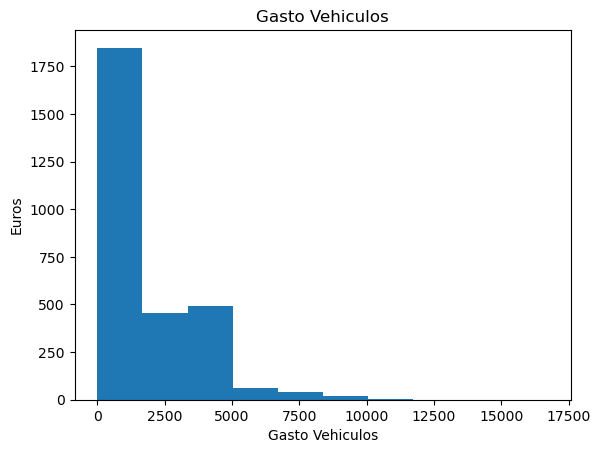

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(datos["Gasto_Vehiculos"], bins = 10, range = (datos["Gasto_Vehiculos"].min(), datos["Gasto_Vehiculos"].max()))
plt.title("Gasto Vehiculos")
plt.xlabel("Gasto Vehiculos")
plt.ylabel("Euros")
plt.show()

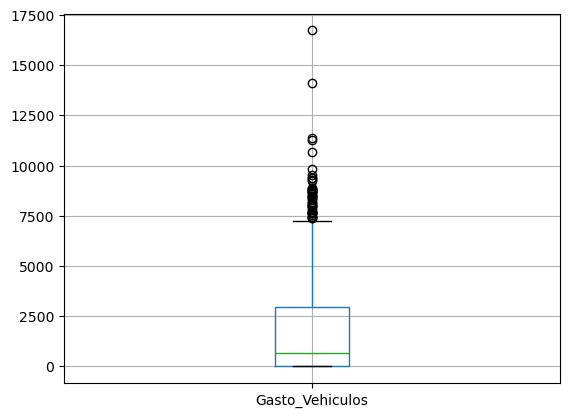

In [22]:
variables.boxplot(column="Gasto_Vehiculos")
plt.show()

También podemos obtener información de variables categóricas:

In [23]:
variables["Sexo"].unique()

array(['Mujer', 'Hombre'], dtype=object)

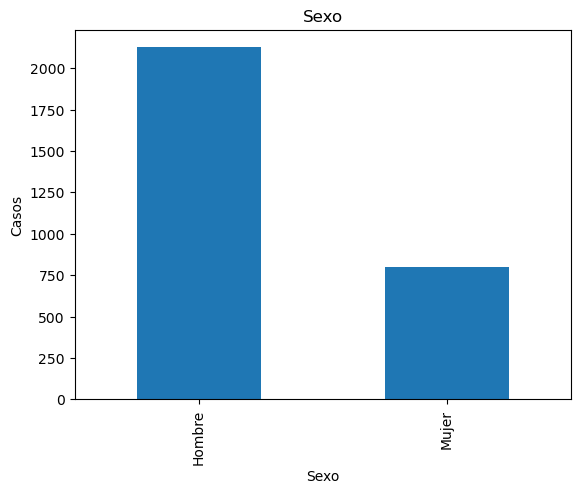

In [24]:
ax = variables["Sexo"].value_counts().plot(kind="bar")
plt.title("Sexo")
plt.xlabel("Sexo")
plt.ylabel("Casos")
plt.show()

<Axes: xlabel='Sexo'>

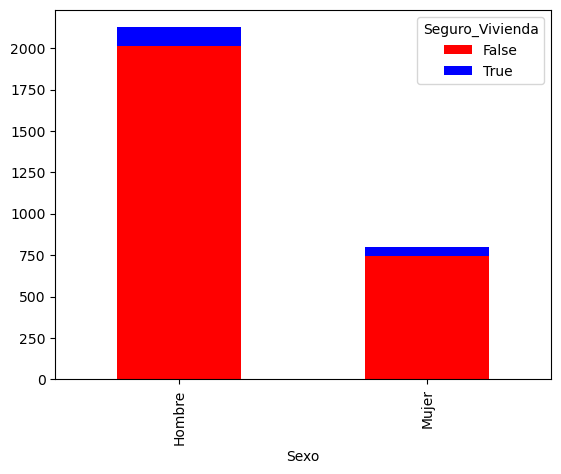

In [25]:
tmp = pd.crosstab([datos.Sexo], datos.Seguro_Vivienda)
tmp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [26]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_Cliente                           2927 non-null   object 
 1   Fecha_Nacimiento                     2927 non-null   object 
 2   Fecha_Alta                           2927 non-null   object 
 3   Sexo                                 2927 non-null   object 
 4   ID_Zona                              2927 non-null   object 
 5   Productos_Vida                       2927 non-null   int64  
 6   Productos_Vehiculos                  2927 non-null   int64  
 7   Productos_Otros                      2927 non-null   int64  
 8   Gasto_Vida                           2927 non-null   float64
 9   Gasto_Vehiculos                      2927 non-null   float64
 10  Gasto_Otros                          2927 non-null   float64
 11  Tipo_Familia                  

## Selección de variables

Hay diversos métodos que nos permiten identificar las mejores variables para resolver nuestro problema. Scikit permite identificar las mejores variables según diversos tests estadísticos, aunque para algunos de ellos debemos utilizar sólo las variables numéricas:

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2 = SelectKBest(chi2, k=10).fit(variables._get_numeric_data(), targets)
for (col, sel) in zip(variables._get_numeric_data().columns.values, chi2.get_support()):
    if sel:
        print(col)
seleccion = chi2.transform(variables._get_numeric_data())

Gasto_Vida
Gasto_Vehiculos
Gasto_Otros
Educacion_Superior
Educacion_Baja
Poblacion_Empresario
Poblacion_Trabajador_No_Cualificado
Vivienda_Propiedad
Vivienda_Alquiler
Medico_Seguro_Privado


Veamos cómo queda representada una muestra del dataset respecto de las dos mejores variables:

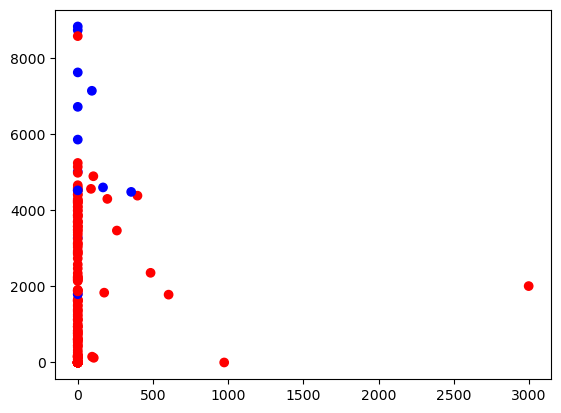

In [28]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(seleccion[1:200, 0], seleccion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Se puede ver cómo al representar las muestras respecto de estas dos variables, los casos de clientes que han contratado el producto se distinguen más fácilmente, ya que tienden a tener un valor alto en una de ellas (puntos azules). Por tanto, estas variables parecen ser buenas a la hora de distinguir casos positivos y negativos.

Cuando el proceso de modelización es costoso, reducir el número de variables puede ser de gran ayuda. Las técnicas de selección de variables se usan ampliamente en los procesos de análisis de datos y modelización.

## Transformación de variables

Es posible también realizar una transformación de variables, obteniendo combinaciones, normalmente lineales, de las variables originales que nos den mejores resultados al introducirlas en los modelos predictivos. SVD, PCA o ICA son algunos ejemplos:

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(variables._get_numeric_data())
print(pca.components_)
print(pca.explained_variance_ratio_)
transformacion = pca.transform(variables._get_numeric_data())

[[ 1.13272484e-05  2.49947982e-04  7.73521138e-05  3.07643903e-03
   9.98926227e-01  4.61104027e-02  4.83515690e-04  9.64832896e-05
  -5.79992186e-04  4.74753804e-04 -3.82916687e-05 -4.36431988e-04
   7.76395166e-04 -1.67202699e-04 -4.09448513e-04 -1.99807434e-04
   1.92596102e-03 -1.92596102e-03  8.38968477e-04 -8.38968477e-04
   1.45851838e-06  1.21989814e-04 -1.23418552e-04]
 [ 2.29104271e-05  9.00357437e-05  4.87987707e-04  1.41580431e-02
  -4.61751332e-02  9.98791715e-01  5.98078053e-05  7.42107667e-04
  -8.02017454e-04 -3.99451289e-04  1.67935439e-04  2.31606373e-04
   1.51812400e-03 -1.35632862e-03 -8.08457612e-04  6.46470913e-04
   5.99488232e-03 -5.99488232e-03  1.36589999e-03 -1.36589999e-03
  -3.22428480e-05 -3.69649764e-05  6.92457105e-05]
 [ 5.40217286e-04 -2.46878994e-05  1.66385989e-04  9.99876166e-01
  -2.43492037e-03 -1.43238167e-02  2.16244726e-03 -2.04578733e-05
  -2.14247137e-03  4.83553780e-04  1.64118780e-03 -2.12421051e-03
   9.03270170e-04  5.64289594e-04 -6.954

Veamos cómo queda representada una muestra del dataset respecto de las dos mejores variables sintéticas:

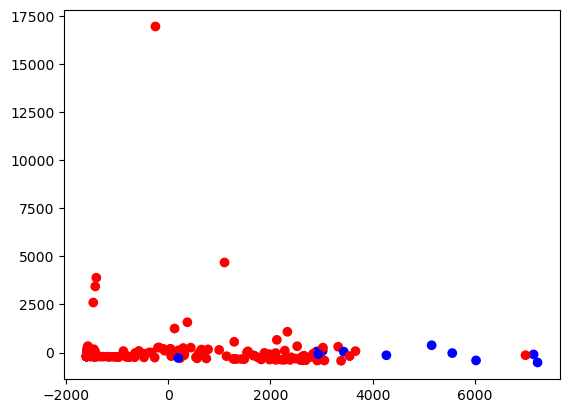

In [30]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(transformacion[1:200, 0], transformacion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Como en el caso anterior, se puede ver que los casos positivos se pueden separar más fácilmente de los negativos al quedar la mayoría de ellos a la derecha de la gráfica.

Es habitual que las variables sintéticas generadas con métodos como PCA sean incluso mejores que las mejores variables seleccionadas con otras técnicas. Como contrapartida, el cálculo de estas variables es costoso y suele ser difícil darles un sentido de negocio.

¿Podrías probar varias técnicas de selección y transformación de variables? Ten en cuenta que no sólo es importante lo buenas que sean las variables finales para la predicción, sino también que el coste de calcularlas sea razonable y que seas capaz de explicar y justificar estas variables en caso de que el cliente lo solicite.

* http://scikit-learn.org/stable/modules/feature_selection.html
* http://scikit-learn.org/stable/modules/decomposition.html

In [3]:
# YOUR CODE HERE
# raise NotImplementedError()
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Features y labels, urilizando get dummies debudo a que hay features que son strings
X = datos.drop(["Seguro_Vivienda"], axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)
y = datos["Seguro_Vivienda"]

# Creación de un modelo
model = ExtraTreesClassifier()

# Ajuste del modelo
model.fit(X_encoded, y)

# Estimación de la importancia de las features
importances = model.feature_importances_

# Obtención del nombre de las features
feature_names = X_encoded.columns

# Combina las features con su valor de importancia
feature_importances = [(feature, importance) for feature, importance in zip(feature_names, importances)]

# Ordena la lista
feature_importances =sorted(feature_importances, key=lambda x: x[1], reverse=True)



print("Las dos características más importantes son:")
# Imprimimos las features con su importancia
for i in range(2):
    print(f"{feature_importances[i][0]}: {feature_importances[i][1]}")



Las dos características más importantes son:
Gasto_Vehiculos: 0.05725492508748634
ID_Zona_Z1129: 0.01050680243412907


La gráfica que nos permite conocer la correlación entre las dos caracteristicas mas importantes es la siguiente:




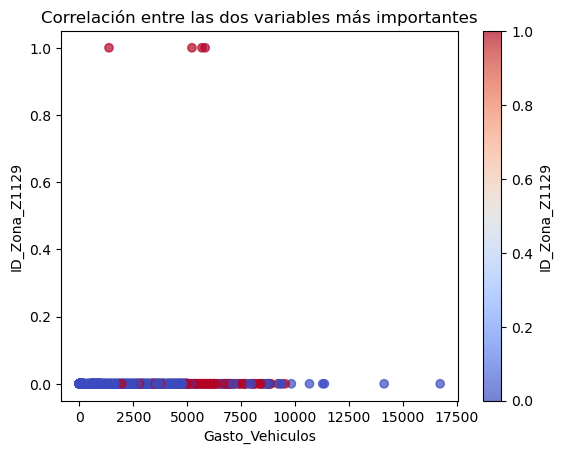

In [4]:
# YOUR CODE HERE
# raise NotImplementedError()

print("La gráfica que nos permite conocer la correlación entre las dos caracteristicas mas importantes es la siguiente:")
print("\n")

# Devuelve el nombre de la feature mas importante
feature1_name = feature_importances[0][0]
# Devuelve el nombre de la segunda feature mas importante
feature2_name = feature_importances[1][0]

# Devuelve el indice de la feature mas importante
feature1_index = X_encoded.columns.get_loc(feature1_name)
# Igual pero con la segunda mas importante
feature2_index = X_encoded.columns.get_loc(feature2_name)

# Representación gráfica
plt.scatter(X_encoded.iloc[:, feature1_index], X_encoded.iloc[:, feature2_index], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel(feature1_name)
plt.ylabel(feature2_name)
plt.title("Correlación entre las dos variables más importantes")
plt.colorbar(label="ID_Zona_Z1129")
plt.show()


Se puede ver que las variables mas importantes sob Gasto_Vehiculos e ID_Zona_Z1129 y su alto nivel de correlación

In [5]:
# YOUR CODE HERE
# raise NotImplementedError()

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Features y labels, urilizando get dummies debido a que hay features que son strings
X = datos.drop(["Seguro_Vivienda"], axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)
y = datos["Seguro_Vivienda"]

# Selección del modelo
model = RandomForestClassifier()
# Configuración del Recursive Feature Elimination
rfe = RFE(estimator=model, n_features_to_select=2)
# Ajuste del modelo
fit = rfe.fit(X_encoded.select_dtypes(include="number"), y)
# Selección de las features
selected_features = X_encoded.select_dtypes(include="number").columns.values[fit.support_]
# Creación de una variable que contiene el ranking de las features
feature_ranking = fit.ranking_

# Selección de las dos features mas importantes
importance_indices = feature_ranking.argsort()[:2]
top_features = X_encoded.select_dtypes(include="number").columns[importance_indices]

print("Las dos características con mayor importancia son:")
for feature in top_features:
    print(feature)

Las dos características con mayor importancia son:
Gasto_Vehiculos
Gasto_Otros


C:\Users\jesus\AppData\Local\Temp\ipykernel_16640\3280157969.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(top_features[top_features.columns[0]], top_features[top_features.columns[1]], cmap='coolwarm')


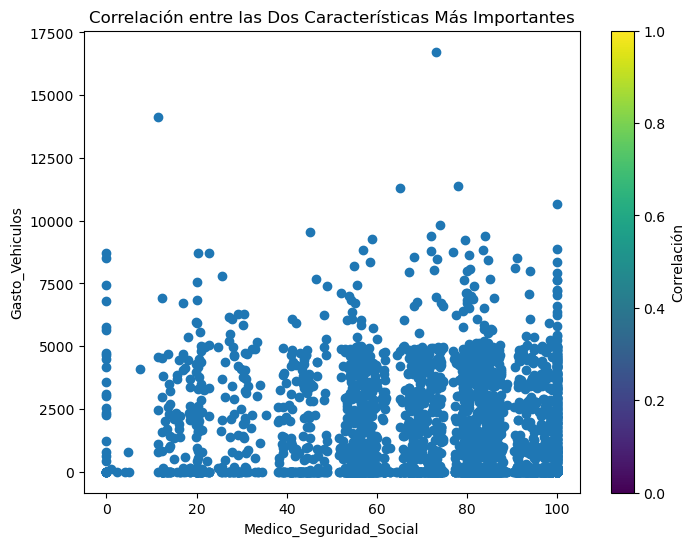

In [27]:
# YOUR CODE HERE
# raise NotImplementedError()
import matplotlib.pyplot as plt
import numpy as np

# Features con mas importancia
top_features = X_encoded[selected_features]

# Estimar la correlación entre dos features
correlation_matrix = top_features.corr()

# Representar grafico para estudiar la correlación entre las dos features mas importantes
plt.figure(figsize=(8, 6))
scatter = plt.scatter(top_features[top_features.columns[0]], top_features[top_features.columns[1]], cmap='coolwarm')
plt.xlabel(top_features.columns[0])
plt.ylabel(top_features.columns[1])
plt.title('Correlación entre las Dos Características Más Importantes')
plt.colorbar(scatter, label='Correlación')

# Obtener los índices de los puntos para asignar el color correspondiente
n = len(top_features)
colors = correlation_matrix.values.flatten()[:n]

plt.show()



## Entrenamiento del modelo

No es evidente cuál es el mejor tipo de modelo para resolver nuestro problema. Por lo tanto, empezaremos con los modelos más sencillos y estables, los modelos lineales. Si los resultados no son suficientemente buenos, probaremos modelos más complejos.

Utilizaremos las variables originales, seleccionadas o transformadas y estudiaremos medidas de calidad como la precisión y el "recall" para evaluar cada uno de los modelos. Para ello, dividiremos el conjunto de datos de entrenamiento de modo que los primeros 2000 patrones servirán para entrenar los modelos, y el resto para validar:

In [6]:
import numpy as np

from sklearn.metrics import classification_report

X_train = variables._get_numeric_data()[1:2000]
X_val = variables._get_numeric_data()[2001:]
y_train = targets[1:2000]
y_val = targets[2001:]

El primer modelo a probar serán la regresión logística:

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

logr = Pipeline([('std', StandardScaler()), ('lr', LogisticRegression())])
logr.fit(X_train, y_train)
print(classification_report(y_val, logr.predict(X_val)))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       868
        True       0.71      0.41      0.52        58

    accuracy                           0.95       926
   macro avg       0.83      0.70      0.75       926
weighted avg       0.95      0.95      0.95       926



Vemos que los modelos lineales tienden a clasificar los patrones de la clase minoritaria como pertenecientes a la clase mayoritaria, por lo que vamos a probar con modelos también sencillos pero no lineales, como árboles de decisión, con la esperanza de obtener mejores resultados:

In [34]:
from sklearn.tree import DecisionTreeClassifier

t = DecisionTreeClassifier()
t.fit(X_train, y_train)
print(classification_report(y_val, t.predict(X_val)))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98       868
        True       0.71      0.69      0.70        58

    accuracy                           0.96       926
   macro avg       0.85      0.84      0.84       926
weighted avg       0.96      0.96      0.96       926



Elegir qué modelo utilizar y ajustarlo no es una tarea fácil. Habitualmente se prueban modelos sencillos y se va subiendo en complejidad si los resultados no son todo lo buenos que nos gustaría. La búsqueda de meta-parámetros es un proceso complejo que habitualmente necesita de cierta experiencia y conocimiento de los modelos.

Intenta mejorar los resultados vistos hasta ahora eligiendo alguno de los modelos e intentando ajustar sus meta-parámetros. Puedes probar a combinar técnicas de selección o transformación de variables con los modelos predictivos, con la ayuda de los pipelines de Scikit-learn.

* http://scikit-learn.org/stable/modules/linear_model.html
* http://scikit-learn.org/stable/modules/neural_network.html
* http://scikit-learn.org/stable/modules/tree.html
* http://scikit-learn.org/stable/modules/svm.html
* http://en.wikipedia.org/wiki/Precision_and_recall

In [8]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
# Pipeline que contiene la serie de pasos que conforman el modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización de las features
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100))), # Selección de las features con la importancia como criterio
    ('feature_transformation', PCA(n_components=3)), # Reducción de la dimensionalidad
    ('classification', RandomForestClassifier()) # Modelo Random forest classifier
])

# Empleo de param_grid para definir los hiperparametros que utilizaremos para hacer un estudio de que hiperparametros nos son mas utiles
param_grid = {
    'feature_selection__estimator__max_features': ['auto', 'sqrt', 'log2'],  # Numero maximo de características que el estimador utilizará
    'feature_transformation__n_components': [3, 5, 7],  # Numero de componentes que quedan despues de realizar el PCA
    'classification__n_estimators': [50, 100, 200], # Numero de arboles que se utilizan en random forest
    'classification__max_depth': [None, 10, 20, 30] # Profundidad maxima de cada arbol
}

# Parametros de la variable que contiene la información de como se realizará la busqueda
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Recopilacuón de los mejores parametros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Evaluación de hiperparametros en el conjunto de validación
y_pred = grid_search.predict(X_val)
print(classification_report(y_val, y_pred))




Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\jesus\anaconda3\envs\experiments\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
420 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jesus\anaconda3\envs\experiments\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jesus\anaconda3\envs\experiments\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jesus\anaconda3\envs\experiments\Lib\site-packag

Mejores parámetros: {'classification__max_depth': 10, 'classification__n_estimators': 100, 'feature_selection__estimator__max_features': 'log2', 'feature_transformation__n_components': 3}
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       868
        True       0.83      0.67      0.74        58

    accuracy                           0.97       926
   macro avg       0.90      0.83      0.86       926
weighted avg       0.97      0.97      0.97       926



## Evaluación del modelo

Ya vimos en el apartado anterior algunos indicadores de la calidad del modelo. También podemos utilizar gráficas como la curva precisión-recall o la curva ROC:

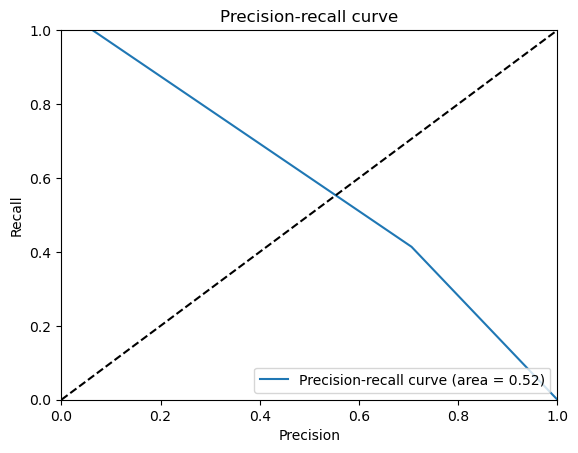

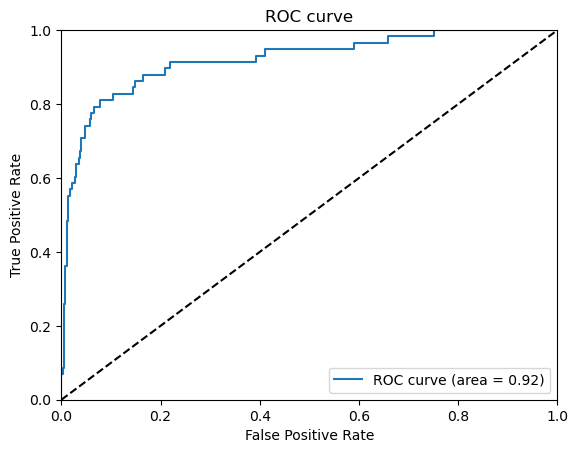

In [36]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_val, logr.predict(X_val))
pr_auc = auc(precision, recall)
plt.figure()
plt.plot(precision, recall, label='Precision-recall curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = roc_curve(y_val, logr.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Es muy habitual utilizar estas gráficas, especialmente la curva ROC, para decidir si los resultados son satisfactorios. Cuanto mayor sea el área que queda bajo la curva, mejores son los resultados del modelo que estamos probando.

Utiliza gráficas (estas u otras que puedas encontrar útiles) para hacer una valoración final de los resultados. Razona las conclusiones.

* http://scikit-learn.org/stable/modules/model_evaluation.html
* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

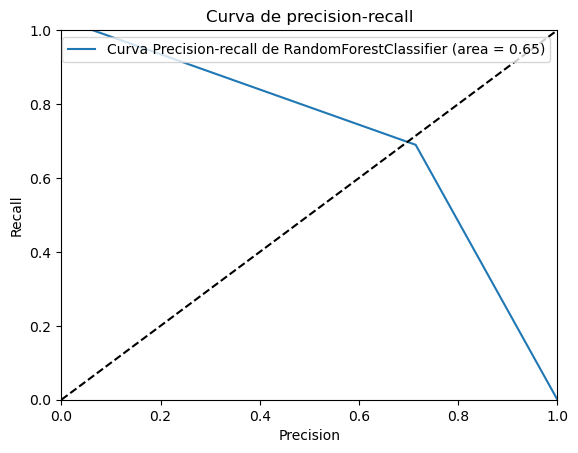

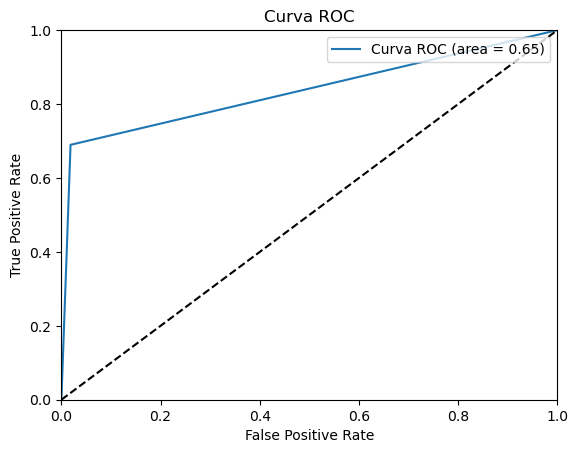

In [41]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
# Definición de la curva precision-recall
precision, recall, thresholds = precision_recall_curve(y_val, t.predict(X_val))
pr_auc = auc(precision, recall)
plt.figure()
plt.plot(precision, recall, label="Curva Precision-recall de RandomForestClassifier (area = %0.2f)" % pr_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Curva de precision-recall")
plt.legend(loc="upper right")
plt.show()

# Definición de la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, t.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label="Curva ROC (area = %0.2f)" % pr_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="upper right")
plt.show()

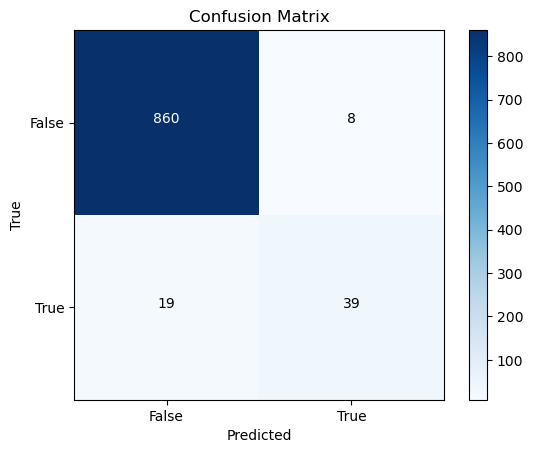

In [9]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Creación de la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred)

labels = np.unique(y_val)

plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()



In [10]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average="weighted")
precision = precision_score(y_val, y_pred, average="weighted")
recall = recall_score(y_val, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("F1 score:", f1)
print("Precision score:", precision)
print("Recall score:", recall)


Accuracy: 0.9708423326133909
F1 score: 0.9694068219738267
Precision score: 0.969077137978261
Recall score: 0.9708423326133909
